In [39]:
#!pip install seaborn

In [40]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
col=["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", 
     "Total_phenols",
     "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", 
     "Hue", "OD280", "Proline"]

In [42]:
df1 = pd.read_csv("wine.xls",names = col)

In [43]:
df1.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [45]:
df1['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [46]:
#df1['Cultivator'].replace({1:'a',2:'b',3:'c'},inplace = True)

In [47]:
target = 'Cultivator'

In [48]:
x = df1.drop(target,axis=1)
y = df1[target]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=2)

In [50]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF["Col"]= x.columns
round(VIF)

,VIF,Col
0,206.0,Alchol
1,9.0,Malic_Acid
2,166.0,Ash
3,73.0,Alcalinity_of_Ash
4,67.0,Magnesium
5,63.0,Total_phenols
6,36.0,Falvanoids
7,17.0,Nonflavanoid_phenols
8,17.0,Proanthocyanins
9,17.0,Color_intensity


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
model = DecisionTreeClassifier()

In [53]:
params = {'max_depth':np.arange(2,10)}

In [54]:
grid = GridSearchCV(model,params,cv=5,scoring='f1')

In [55]:
grid.fit(x_train,y_train)

C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
 

C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Sivavamsi.Poka\Music\new\envs\p3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [56]:
grid.best_params_

{'max_depth': 2}

In [57]:
model = DecisionTreeClassifier(max_depth=2)

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [59]:
pd.DataFrame(model.feature_importances_,columns=['imp'],index=x.columns)

,imp
Alchol,0.000000
Malic_Acid,0.000000
Ash,0.000000
Alcalinity_of_Ash,0.000000
Magnesium,0.000000
Total_phenols,0.000000
Falvanoids,0.492057
Nonflavanoid_phenols,0.000000
Proanthocyanins,0.000000
Color_intensity,0.450919


In [64]:
metrics.f1_score(y_test,model.predict(x_test),average='weighted') #by default binary avarage

0.8715590008613264

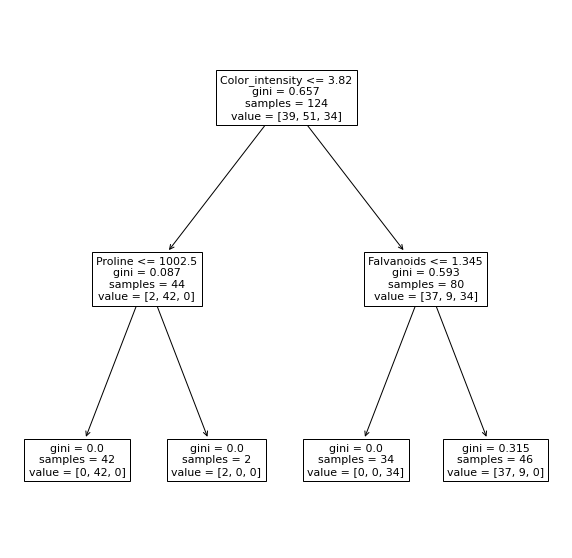

In [65]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model,feature_names = list(x))

In [66]:
fig.savefig("tree.png")

In [69]:
print(metrics.classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       0.90      0.90      0.90        20
           3       1.00      0.79      0.88        14

    accuracy                           0.87        54
   macro avg       0.89      0.86      0.87        54
weighted avg       0.88      0.87      0.87        54



In [70]:
7448.588504076004/60

124.14314173460006